<a href="https://colab.research.google.com/github/VatsalSin/PyData-Patna/blob/main/PyData_Patna_ARIMA_%26_SARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyData Patna Conference

## ARIMA and SARIMA Model


In [1]:
#to install the pyramid-arima library if not already installed
!pip install pyramid-arima

     |████████████████████████████████| 604kB 12.6MB/s 


In [2]:
#download the dataset
!wget https://raw.githubusercontent.com/VatsalSin/PyData-Patna/main/Datasets/AirPassengers.csv

--2020-12-05 00:20:44--  https://raw.githubusercontent.com/VatsalSin/PyData-Patna/main/Datasets/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-12-05 00:20:45 (18.3 MB/s) - ‘AirPassengers.csv’ saved [1746/1746]



In [3]:
#importing useful libraries

import pandas as pd   #python library to manage datasets
import numpy as np    #python library for matheimatical and linear algebra operations

import matplotlib.pyplot as plt #python library for plotting graphs

from pyramid.arima import auto_arima #python library that contains the auto_arima function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #python library for plooting the ACF and PACF

from sklearn.metrics import mean_absolute_error   #a function to calculate the mean absolute error for the forecasts



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

In [4]:
#we can also define our own metric functions like MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Importing and preparing the dataset

In [5]:
#importing the dataset from a CSV file into a pandas dataframe

df = pd.read_csv('/content/AirPassengers.csv')
print(df)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


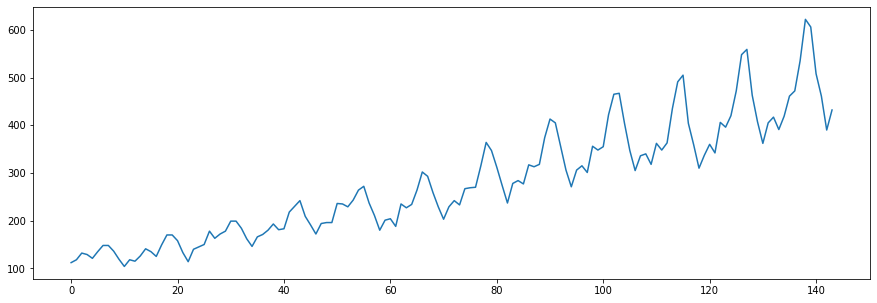

In [6]:
#plot the time series

plt.figure(figsize=(15, 5))     #set the plot size
df['#Passengers'].plot()               

In [7]:
#calculating the size of training and test set.

data_len = len(df)                            #calculate the size of the original dataset
train_data_len = int(data_len*0.75)           #calculate 75% of the original data to get the size of training set
test_data_len = int(data_len - train_data_len)#calculate 25% of the original data to get the size of training set
print('Length of data =', data_len)
print('Training Data Length =', train_data_len)
print('Test Data Length =', test_data_len)

Length of data = 144
Training Data Length = 108
Test Data Length = 36


In [8]:
#dividing the data into train and test set.

df_train = df[:train_data_len]
df_test = df[train_data_len:]

### Analysing the ACF and PACF plots of the time series

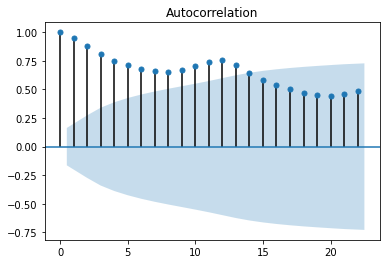

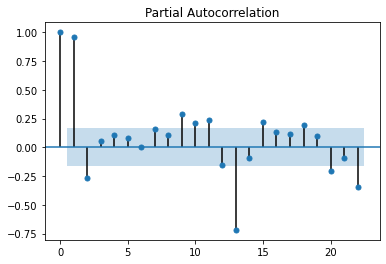

In [9]:
fig1 = plot_acf(df['#Passengers'])
fig2 = plot_pacf(df['#Passengers'])

### Building the arima model

In [10]:
#df['#Passengers']: the time series
#start_p: the min value of p we want to try
#start_q: the min value of p we want to try
#max_p: the max value of p we want to try
#max_q: the max value of p we want to try
#seasonal = True: means that the time series is seasonal
#m = the seasonality of data(the period of seasonal differencing)

model = auto_arima(df_train['#Passengers'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=707.520, BIC=720.290, Fit time=0.683 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=709.652, BIC=714.760, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=706.057, BIC=716.273, Fit time=0.360 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=706.655, BIC=716.871, Fit time=0.279 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=705.875, BIC=713.536, Fit time=0.106 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=706.341, BIC=716.556, Fit time=0.286 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=707.868, BIC=720.638, Fit time=0.698 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=707.580, BIC=717.796, Fit time=0.183 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=706.973, BIC=717.189, Fit time=0.210 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 

In [11]:
#print model description
print(model)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')


In [12]:
#fit the model using the training data
model.fit(df_train['#Passengers'])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 0, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

### Forecasting

In [13]:
forecast = model.predict(n_periods = test_data_len) #forecast the future values, number of values to be forecasted = the size of test data
forecast = pd.Series(forecast)        #converting the forecasted values in pandas series
forecast.index = df_test.index             #reindexing the pandas series with the index of test series

### Analysis of results obtained

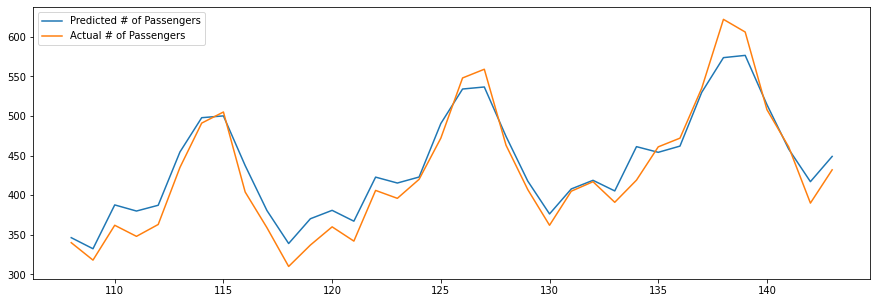

In [14]:
#plotting the forecast values along with actual value for a comparision only for test data

plt.figure(figsize=(15, 5))                                            #set the plot size
forecast.plot(label = 'Predicted # of Passengers')    #plot the predicted value only for test data
df['#Passengers'][train_data_len:].plot(label = 'Actual # of Passengers') #plot the actual value of time series only for test data
plt.legend()           

In [15]:
#calculate the metrics for the forecasts
y_true = df['#Passengers'][train_data_len:]                       #assign actual values of # of Passenger to y_true
y_pred = forecast                                                 #assign predicted values of # of Passenger to y_pred
print('MAE =', mean_absolute_error(y_true, y_pred))               #calculate and print the MAE
print('MAPE =', mean_absolute_percentage_error(y_true, y_pred))   #calculate and print the MAE


MAE = 17.81885367670425
MAPE = 4.356744831483892


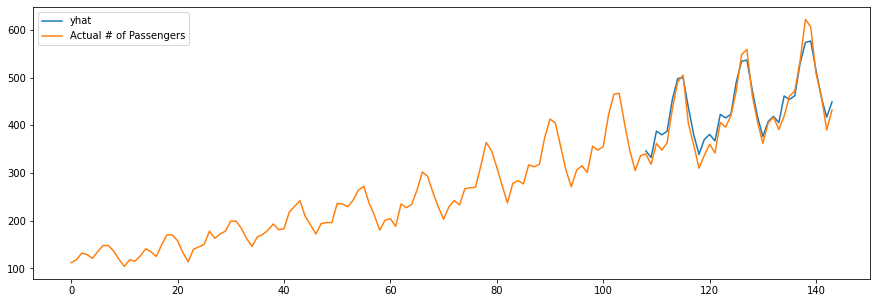

In [16]:
#plotting the forecast values along with actual value for a comparision

plt.figure(figsize=(15, 5))                                     #set the plot size
forecast.plot(label = 'yhat')                                   #plot the predicted values
df['#Passengers'].plot(label = 'Actual # of Passengers')        #plot the actual value of time series
plt.legend()           